### **Reference**

The following provides an implementation of the LogTransform and MultipleLinearRegression classes which you will use in the last exercise.

#### Log Transform

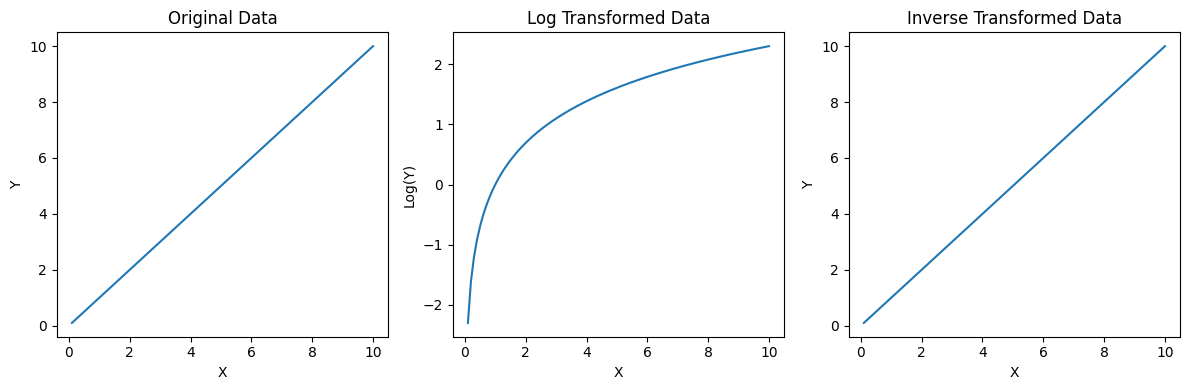

Transformation and inverse transformation verified!


In [1]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransform(BaseEstimator, TransformerMixin):
    def __init__(self, base=np.e):
        self.base = base

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.array(X)
        if np.any(X <= 0):
            raise ValueError("Input contains non-positive values. Cannot apply log transform.")
        return np.log(X) / np.log(self.base)

    def inverse_transform(self, X):
        return np.power(self.base, X)

# Test the implementation
import matplotlib.pyplot as plt

# Create some sample data
X = np.linspace(0.1, 10, 100).reshape(-1, 1)

# Initialize and use the LogTransform
log_transformer = LogTransform(base=np.e)
X_transformed = log_transformer.fit_transform(X)
X_inverse = log_transformer.inverse_transform(X_transformed)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(X, X)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(132)
plt.plot(X, X_transformed)
plt.title("Log Transformed Data")
plt.xlabel("X")
plt.ylabel("Log(Y)")

plt.subplot(133)
plt.plot(X, X_inverse)
plt.title("Inverse Transformed Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

# Verify that inverse_transform reverses transform
np.testing.assert_allclose(X, X_inverse)
print("Transformation and inverse transformation verified!")

#### Multiple Linear Regression

R-squared score: 0.9820


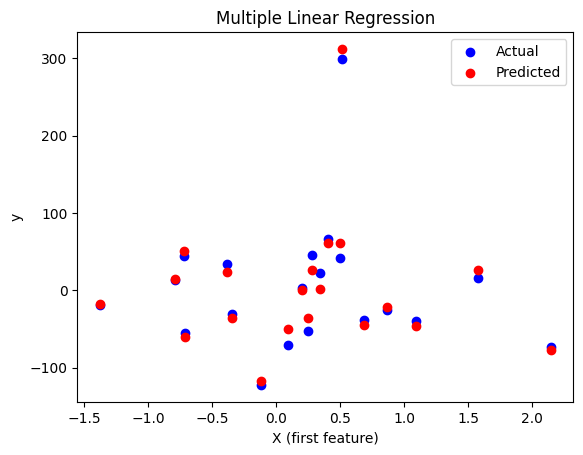

Coefficients: [28.4103783  74.37536728 18.74555896]
Intercept: 1.3052
sklearn LinearRegression R-squared score: 0.9820


In [2]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array

class MultipleLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        n_samples, n_features = X.shape

        # Initialize parameters
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict(X)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict(X)


# Test the implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = MultipleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared score
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

# Plot results (for the first feature)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X (first feature)')
plt.ylabel('y')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print(f"Intercept: {model.intercept_:.4f}")

# Compare with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
sk_score = sk_model.score(X_test, y_test)
print(f"sklearn LinearRegression R-squared score: {sk_score:.4f}")

### **Exercise 1**

In this exercise, you will learn about scikit-learn pipelines and use them to combine your custom LogTransform class from Exercise 2 from last week with your MultipleLinearRegression class from Exercise 2. This will demonstrate how your custom classes can be integrated into the scikit-learn ecosystem.

#### Introduction to Pipelines

Pipelines in scikit-learn are a way to chain multiple steps that can be cross-validated together while setting different parameters. They help in preventing data leakage between train and test sets and make your code cleaner and more modular.

The `make_pipeline` function is a simple way to create a pipeline. It takes a series of estimators and returns a pipeline that chains them in sequence.

#### Task:

1. Create a pipeline that applies the LogTransform to the input features and then uses the MultipleLinearRegression for prediction.
2. Compare the performance of this pipeline with a pipeline using sklearn's StandardScaler and LinearRegression.
3. Use the pipelines on a dataset where a log transformation might be beneficial (e.g., data with exponential relationships in the features).

#### Requirements:

- Use the LogTransform class you implemented in Exercise 2.
- Use the MultipleLinearRegression class you implemented in Exercise 5.
- Create two pipelines using `make_pipeline`:
  a. Custom pipeline: LogTransform -> MultipleLinearRegression
  b. sklearn pipeline: StandardScaler -> LinearRegression
- Generate a synthetic dataset where log transformation of features could be beneficial.
- Compare the R-squared scores of both pipelines.
- Create scatter plots comparing the predictions of both pipelines against the true values.

#### Hints:

- You can use `make_regression` with an exponential transformation on the features to create a dataset where log transformation might be useful.
- Remember to handle any potential issues with non-positive values when applying the log transform.
- Use scikit-learn's `make_pipeline` function to create the pipelines.

R-squared scores:
Custom Pipeline: 1.0000
sklearn Pipeline: 0.5910


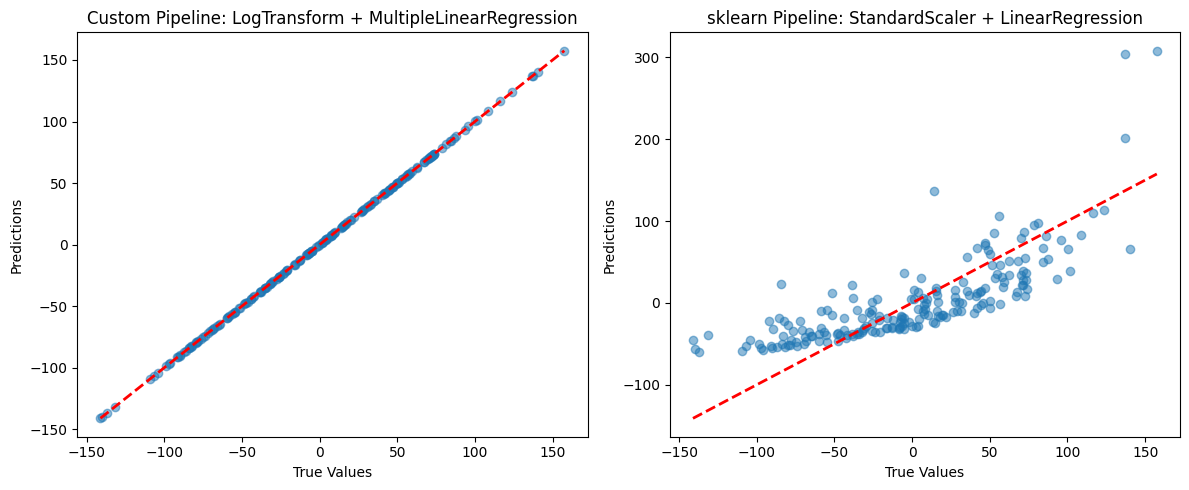


Custom Pipeline steps:
[('logtransform', LogTransform()), ('multiplelinearregression', MultipleLinearRegression())]

sklearn Pipeline steps:
[('standardscaler', StandardScaler()), ('linearregression', LinearRegression())]

Regression Coefficients:
Custom Pipeline: [28.61704611 46.06869671 16.82318262 24.74374245 18.99451706]
sklearn Pipeline: [23.43507761 35.92244215 12.45041279 18.8594685  16.70651092]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your LogTransform and MultipleLinearRegression classes from previous exercises
# from log_transform import LogTransform
# from multiple_linear_regression import MultipleLinearRegression

# Generate synthetic data with exponential relationship in features
n_samples, n_features = 1000, 5
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1, random_state=42)
X = np.exp(X)  # Apply exponential transformation to create non-linear relationship in features
X = np.abs(X) + 1e-5  # Ensure all values are positive for log transform

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create custom pipeline
custom_pipeline = make_pipeline(
    LogTransform(),
    MultipleLinearRegression()
)

# Create sklearn pipeline
sklearn_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Fit both pipelines
custom_pipeline.fit(X_train, y_train)
sklearn_pipeline.fit(X_train, y_train)

# Make predictions
custom_pred = custom_pipeline.predict(X_test)
sklearn_pred = sklearn_pipeline.predict(X_test)

# Calculate R-squared scores
custom_r2 = r2_score(y_test, custom_pred)
sklearn_r2 = r2_score(y_test, sklearn_pred)

print("R-squared scores:")
print(f"Custom Pipeline: {custom_r2:.4f}")
print(f"sklearn Pipeline: {sklearn_r2:.4f}")

# Create scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(y_test, custom_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Custom Pipeline: LogTransform + MultipleLinearRegression")

plt.subplot(122)
plt.scatter(y_test, sklearn_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("sklearn Pipeline: StandardScaler + LinearRegression")

plt.tight_layout()
plt.show()

# Compare pipeline steps
print("\nCustom Pipeline steps:")
print(custom_pipeline.steps)

print("\nsklearn Pipeline steps:")
print(sklearn_pipeline.steps)

# If you want to access the coefficients of the regression models:
custom_coef = custom_pipeline.named_steps['multiplelinearregression'].coef_
sklearn_coef = sklearn_pipeline.named_steps['linearregression'].coef_

print("\nRegression Coefficients:")
print("Custom Pipeline:", custom_coef)
print("sklearn Pipeline:", sklearn_coef)

### **Exercise 2** 

In this exercise, you'll create a simple sklearn Pipeline that combines preprocessing steps with a machine learning model. 
Your tasks:

- Create a pipeline that includes OneHotEncoder, StandardScaler, and a simple model (e.g., LinearRegression)
- Fit the pipeline on the training data
- Make predictions using the pipeline
- Evaluate the model's performance

Cross-validation RMSE scores: [15.86858439 15.59773414 13.85797187 16.45764711 15.45227146]
Mean RMSE: 15.45 (+/- 1.73)
Coefficient of Variation of RMSE: 5.60%

Test set R-squared: 0.91


/tmp/ipykernel_3506/1607627607.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(rmse_scores, labels=['RMSE'])


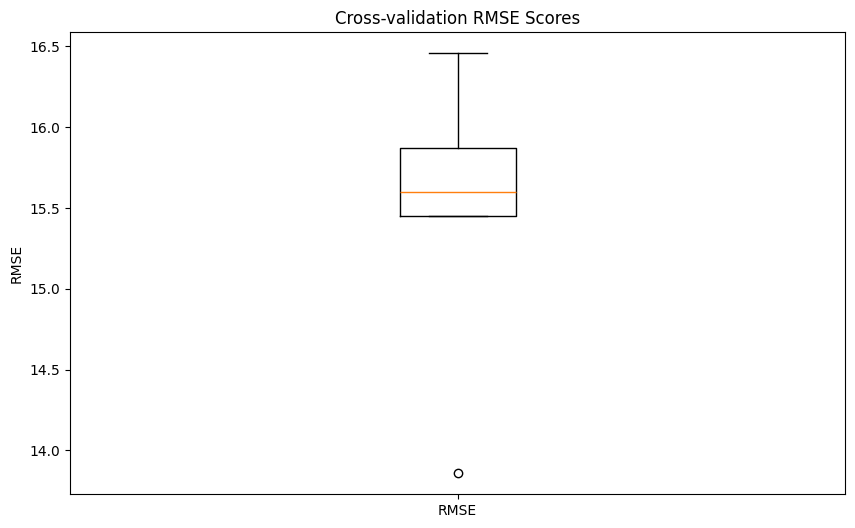

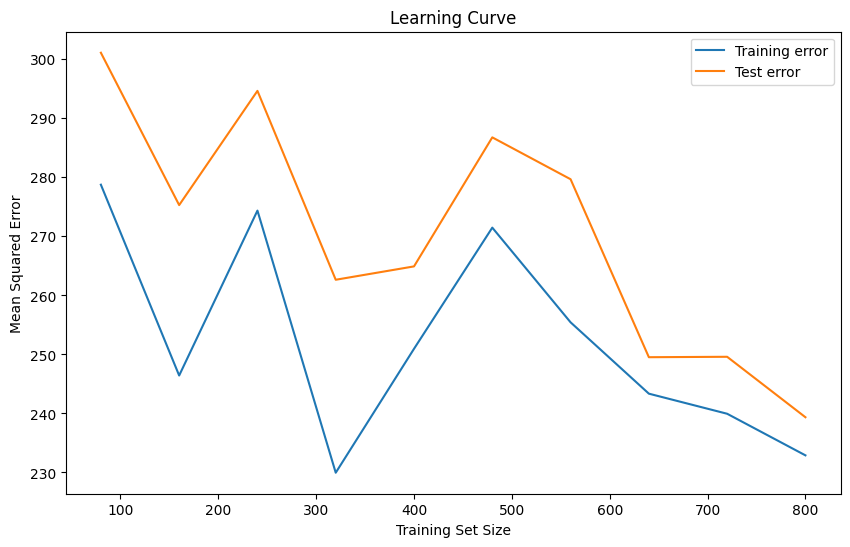

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

area = np.random.uniform(1000, 5000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.uniform(1, 50, n_samples)
neighborhood = np.random.choice(['A', 'B', 'C', 'D', 'E'], n_samples)
distance_to_city_center = np.random.exponential(scale=5, size=n_samples)

price = (
    10 * np.log(area) +
    5 * bedrooms -
    2 * age +
    np.where(neighborhood == 'A', 50, 0) +
    np.where(neighborhood == 'C', 30, 0) +
    np.where(neighborhood == 'E', 10, 0) +
    np.where(neighborhood == 'D', -20, 0) +
    np.where(neighborhood == 'B', -40, 0) -
    20 * np.log(distance_to_city_center + 1) +
    np.random.normal(0, 10, n_samples)
)

# Create DataFrame
df = pd.DataFrame({
    'area': area,
    'bedrooms': bedrooms,
    'age': age,
    'neighborhood': neighborhood,
    'distance_to_city_center': distance_to_city_center,
    'price': price
})

# Introduce missing values
df.loc[np.random.choice(df.index, 50, replace=False), 'neighborhood'] = np.nan
df.loc[np.random.choice(df.index, 30, replace=False), 'bedrooms'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'age'] = np.nan



# Split the data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Define the feature types
numeric_features = ['area', 'bedrooms', 'age', 'distance_to_city_center']
categorical_features = ['neighborhood']

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(drop='first'))
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, ['neighborhood']),
         ("num", num_pipeline, ['area', 'bedrooms', 'age', 'distance_to_city_center'])
    ])

# Create a pipeline that includes the preprocessor and a LinearRegression model
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor', LinearRegression())
])

# TODO: Perform 5-fold cross-validation
# Hint: Use cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert MSE scores to positive values and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", rmse_scores)
print(f"Mean RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

# TODO: Calculate and print the coefficient of variation (CV) of the RMSE scores
# Hint: CV = (standard deviation / mean) * 100

cv_rmse = (rmse_scores.std() / rmse_scores.mean()) * 100
print(f"Coefficient of Variation of RMSE: {cv_rmse:.2f}%")

# Compare with test set performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"\nTest set R-squared: {test_score:.2f}")

# Bonus: Visualize cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(rmse_scores, labels=['RMSE'])
plt.title('Cross-validation RMSE Scores')
plt.ylabel('RMSE')
plt.show()

# Bonus: Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()